# Expression Quality Control (Part 1)
This is a template notebook for performing preliminary quality control on your organism's expression data.

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os
from os import path
import ipywidgets as widgets

### Merge output data to generate input for anlaysis

Enter path of log-TPM, MultiQC, and metadata files here

In [2]:
sns.set_style('ticks')
#Specify input data needed
species = 'Synechocystis_sp_PCC_6803'
log_TPM_filename = 'log_tpm.csv'
multiqc_filename = 'multiqc_stats.tsv'
metadata_filename = 'metadata.tsv'
target_files = [log_TPM_filename, multiqc_filename, metadata_filename]

In [3]:
output_dr =  path.join('Species', species, 'nf_results')

log_tpm_dfs = []
multiqc_dfs = []
metadata_dfs = []

display_text_style = '<b>%s</b>'

print('Parsing input files:')
for subdir, dirs, files in os.walk(output_dr):
    for file in files:
        filepath = path.join(subdir, file)
        file_of_interest = [target_file for target_file in target_files if target_file in filepath]
        
        if file_of_interest:
        
            if file_of_interest[0] == log_TPM_filename:
                print(filepath)
                df = pd.read_csv(filepath, index_col=0).fillna(0)
                log_tpm_dfs.append(df)

            if file_of_interest[0] == multiqc_filename:
                print(filepath)
                df = pd.read_csv(filepath, index_col=0, sep='\t')
                multiqc_dfs.append(df)

            if file_of_interest[0] == metadata_filename:
                print(filepath)
                df = pd.read_csv(filepath, index_col=0, sep='\t')
                metadata_dfs.append(df)

DF_log_tpm = pd.concat(log_tpm_dfs, axis=1).fillna(0)
display(widgets.HTML(display_text_style % 'INPUT OF EXPRESSION DATA'))
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])
display(DF_log_tpm.head())

DF_qc_stats = pd.concat(multiqc_dfs)
display(widgets.HTML(display_text_style % 'INPUT OF QC DATA'))
display(widgets.HTML('There may be some datasets that failed along the processing pipeline, so the number of samples with QC data may be higher than the number of samples with expression data.'))
print('Number of samples with QC data:',DF_qc_stats.shape[0])
display(DF_qc_stats.head())

DF_metadata = pd.concat(metadata_dfs)
display(widgets.HTML(display_text_style % 'INPUT OF METADATA'))
print('Number of samples with metadata:',DF_metadata.shape[0])
display(DF_metadata.head())

Parsing input files:
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_11/multiqc_stats.tsv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_11/log_tpm.csv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_11/selected_metadata.tsv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_9/multiqc_stats.tsv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_9/log_tpm.csv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_9/selected_metadata.tsv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_2/multiqc_stats.tsv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_2/log_tpm.csv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_2/selected_metadata.tsv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_10/multiqc_stats.tsv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_10/log_tpm.csv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_10/selected_metadata.tsv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_8/multiqc_stats.tsv
Species/Synechocystis_sp_PCC_6803/nf_results/bulk_8/log_tpm.csv
Species

HTML(value='<b>INPUT OF EXPRESSION DATA</b>')

Number of genes: 3690
Number of samples: 214


,SRX12668170,SRX12668171,SRX12668172,SRX12668173,SRX12668174,SRX12668175,SRX12668176,SRX12668177,SRX12668178,SRX12668179,...,SRX368721,SRX368722,SRX368724,SRX368725,SRX9848492,SRX9848493,SRX9848502,SRX9848503,SRX9848504,SRX9848505
Geneid,,,,,,,,,,,,,,,,,,,,,
SGL_RS01880,5.050498,4.822078,4.813050,2.030264,3.471039,5.296047,0.000000,4.883323,2.317709,5.166668,...,3.974924,4.468625,5.844019,6.760316,2.375611,1.959287,2.391862,2.040233,2.096001,2.746660
SGL_RS01885,6.877468,6.587161,6.855133,4.406723,6.068228,5.961641,5.832635,7.108502,6.790084,7.162296,...,6.630731,6.471212,7.081125,7.990573,5.379352,4.990329,4.966682,5.371024,5.430836,5.758562
SGL_RS01890,6.768408,6.721750,6.686568,5.617392,5.906434,6.709162,5.413916,5.563909,4.602840,7.035368,...,6.151221,5.339159,6.962745,7.993129,4.925588,5.500913,5.423294,5.796995,6.118251,6.229139
SGL_RS01895,10.207298,10.174856,10.050620,10.077470,10.444542,10.180054,10.150870,10.159727,9.911129,10.106709,...,7.679186,8.404703,9.714716,9.430372,7.108838,7.377096,7.134002,7.762221,7.934041,7.817227
SGL_RS01900,8.565986,8.564767,8.579692,8.829433,8.738924,8.679714,9.050206,8.340281,8.362165,8.676250,...,6.372499,6.237091,7.460491,7.435678,4.751701,4.955141,4.944198,4.908169,5.113447,5.176185


HTML(value='<b>INPUT OF QC DATA</b>')

HTML(value='There may be some datasets that failed along the processing pipeline, so the number of samples wit…

Number of samples with QC data: 214


,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
Sample,,,,,,,,,,,,,,,,,,,,,
SRX12668170,11520352,2285079,3749464,4909089,0,0,0,0,1841,0,...,11521763,1649856286,287036,1644288257,0.337486,0.0271,0.1981,0.7747,NaN,NaN
SRX12668171,14720811,2320889,3736416,8097864,0,0,0,0,868,0,...,14722609,2109687846,358866,2103818677,0.278201,0.0258,0.1997,0.7745,NaN,NaN
SRX12668172,11368279,2554850,3222069,4960801,0,0,0,0,683,0,...,11368672,1613424812,275870,1608709221,0.292272,0.0312,0.2251,0.7437,NaN,NaN
SRX12668173,12834537,380206,1913647,10456589,0,0,0,0,110,0,...,12835973,1827961481,303533,1822656701,0.290202,0.0092,0.0935,0.8973,NaN,NaN
SRX12668174,11292254,335522,1924416,8946445,0,0,0,0,70,0,...,11293865,1600767763,266382,1596228904,0.283543,0.0099,0.0804,0.9097,NaN,NaN


HTML(value='<b>INPUT OF METADATA</b>')

Number of samples with metadata: 214


,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash,R1,R2
Experiment,,,,,,,,,,,,,,,,,,,,,
SRX12668170,SRR16464638,2021-10-21 12:51:12,2021-10-19 22:25:55,11521763,3304438182,11521763,286,1081,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,GEO,SRA1312575,NaN,public,B23F24CD4544D3CF2FF76B076B791FB0,F14BE5C31DBCBF9FDBCC8743D80284ED,NaN,NaN
SRX12668171,SRR16464639,2021-10-21 12:51:12,2021-10-19 22:37:27,14722609,4211672855,14722609,286,1382,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,GEO,SRA1312575,NaN,public,13AF2D44A3CB5D3E7BCBBB123FA5F6B1,1A4884B20D76E03FD5DC55E9B376EC7A,NaN,NaN
SRX12668172,SRR16464640,2021-10-21 12:51:12,2021-10-19 22:26:38,11368672,3231868266,11368672,284,1057,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,GEO,SRA1312575,NaN,public,C2B5A8D874C4988BBFB8B3F81C45B4C3,E7682D21F5669C0C426900E59A58637F,NaN,NaN
SRX12668173,SRR16464641,2021-10-21 12:51:12,2021-10-19 22:35:10,12835973,3648283176,12835973,284,1188,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,GEO,SRA1312575,NaN,public,E2F1CB56091B86A8797CB1A0B8D8AA49,0F50D3752E33265B73C7F04C34C78ADE,NaN,NaN
SRX12668174,SRR16464642,2021-10-21 12:51:12,2021-10-19 22:25:12,11293865,3195027108,11293865,282,1040,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,NaN,NaN,GEO,SRA1312575,NaN,public,3A20189D4682661312D323DDDD7EE8CE,8260A8A0EABCD2C83E7FDF43D5D661CF,NaN,NaN


### Remove extra sample rows

Ensure that metadata and qc_stats data contain all log_tpm sample information.

In [4]:
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [5]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

## Check QC statistics

### FastQC quality control

In [6]:
fastqc_cols = ['per_base_sequence_quality',
               'per_tile_sequence_quality',
               'per_sequence_quality_scores',
               'per_base_sequence_content',
               'per_sequence_gc_content',
               'per_base_n_content',
               'sequence_length_distribution',
               'sequence_duplication_levels',
               'overrepresented_sequences',
               'adapter_content']

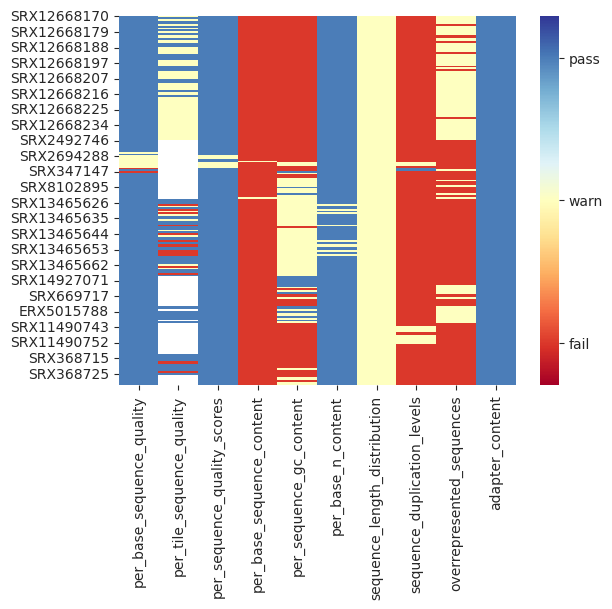

In [7]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

The following four categories are the most important:
* per_base_sequence_quality
* per_sequence_quality_scores
* per_base_n_content
* adapter_content
    
If a sample does not pass any of these four categories, discard the sample.

In [8]:
fastqc_fail_cols = ['per_base_sequence_quality',
                    'per_sequence_quality_scores',
                    'per_base_n_content',
                    'adapter_content']

In [9]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
print('Number of samples not meeting the quality criteria:', len(DF_failed_fastqc))
DF_failed_fastqc[fastqc_fail_cols]

Number of samples not meeting the quality criteria: 19


,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
SRX2694286,warn,pass,pass,pass
SRX2694288,warn,warn,pass,pass
SRX1643160,warn,warn,pass,pass
SRX1643581,warn,pass,pass,pass
SRX1643582,warn,pass,pass,pass
SRX1643625,warn,warn,pass,pass
SRX1643626,warn,warn,pass,pass
SRX1643627,warn,warn,pass,pass
SRX347145,fail,pass,pass,pass
SRX347147,fail,pass,pass,pass


Mark samples that passed.

In [10]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)
DF_pass_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] == 'pass').all(axis=1)]
print('Number of samples meeting the quality criteria:', len(DF_pass_fastqc))
DF_pass_fastqc

Number of samples meeting the quality criteria: 195


,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
SRX12668170,pass,pass,pass,pass
SRX12668171,pass,pass,pass,pass
SRX12668172,pass,pass,pass,pass
SRX12668173,pass,pass,pass,pass
SRX12668174,pass,pass,pass,pass
...,...,...,...,...
SRX9848493,pass,pass,pass,pass
SRX9848502,pass,pass,pass,pass
SRX9848503,pass,pass,pass,pass
SRX9848504,pass,pass,pass,pass


### Number of aligned reads

The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.

In [11]:
min_mrna_reads = 500000 # Minimum number of reads mapped to mRNA (500,000)

Text(0.5, 1.0, 'Number of reads mapped to CDS')

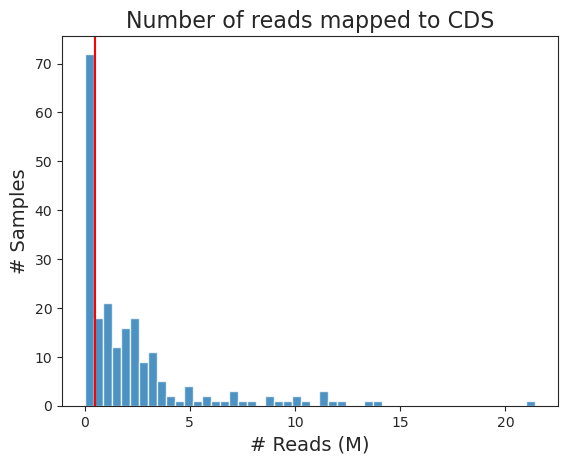

In [12]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

Identify samples with poor read depth:

In [13]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,pe_sense,pe_antisense,failed,se_sense,se_antisense
SRX1643625,70493,1872,7613,48113,0,0,0,0,0,0,...,82403,15385006,2101843,13251952,13.864499,NaN,NaN,0.4722,0.1667,0.3611
SRX1643627,173272,9654,45465,115769,0,0,0,0,0,0,...,186988,40481415,4117573,36288411,10.357849,NaN,NaN,0.5556,0.2424,0.2020
SRX1643581,328003,9684,100385,216329,0,0,0,0,0,0,...,348924,76077870,6239524,69695028,8.389880,NaN,NaN,0.5165,0.2088,0.2747
SRX1643626,183606,12284,47254,121476,0,0,0,0,0,0,...,214860,39800725,5376956,34342027,13.715072,NaN,NaN,0.5463,0.2407,0.2130
SRX1643582,1113171,21790,348237,739550,0,0,0,0,0,0,...,1183474,257654580,20313378,236858158,8.071435,NaN,NaN,0.5024,0.2319,0.2657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRX2694286,3033209,416910,692058,1044713,0,0,0,0,0,0,...,3219388,327034985,9269086,316596767,3.191774,NaN,NaN,0.5544,0.3849,0.0607
SRX368725,31981731,419105,13493836,17670279,0,0,0,0,0,0,...,31985927,3198592700,405080439,2769136381,13.426415,NaN,NaN,0.1006,0.8958,0.0037
SRX12668193,12360799,442782,1684554,10108794,0,0,0,0,148,0,...,12361999,1744188867,295446,1738763485,0.311055,0.0176,0.1096,0.8728,NaN,NaN
SRX13465654,21768731,453851,20969148,88083,0,0,0,0,0,0,...,21859183,1106880440,3588217,1102057417,0.435731,NaN,NaN,0.9093,0.0032,0.0875


Mark samples that passed.

In [14]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

### Examine Global Correlations

Only examine data that passed the first two steps.

In [15]:
metadata_passed_step2 = DF_metadata[DF_metadata[['passed_fastqc','passed_reads_mapped_to_CDS']].all(axis=1)]
DF_log_tpm_passed_step2 = DF_log_tpm[metadata_passed_step2.index]
DF_log_tpm_passed_step2

,SRX12668170,SRX12668171,SRX12668172,SRX12668176,SRX12668179,SRX12668183,SRX12668188,SRX12668189,SRX12668194,SRX12668195,...,SRX368720,SRX368721,SRX368722,SRX368724,SRX9848492,SRX9848493,SRX9848502,SRX9848503,SRX9848504,SRX9848505
Geneid,,,,,,,,,,,,,,,,,,,,,
SGL_RS01880,5.050498,4.822078,4.813050,0.000000,5.166668,4.516703,5.186998,5.201185,5.525648,5.344518,...,3.928007,3.974924,4.468625,5.844019,2.375611,1.959287,2.391862,2.040233,2.096001,2.746660
SGL_RS01885,6.877468,6.587161,6.855133,5.832635,7.162296,6.771085,6.601193,6.925857,6.989453,7.013504,...,6.925320,6.630731,6.471212,7.081125,5.379352,4.990329,4.966682,5.371024,5.430836,5.758562
SGL_RS01890,6.768408,6.721750,6.686568,5.413916,7.035368,6.674603,6.855485,6.982362,6.820151,6.553323,...,6.474148,6.151221,5.339159,6.962745,4.925588,5.500913,5.423294,5.796995,6.118251,6.229139
SGL_RS01895,10.207298,10.174856,10.050620,10.150870,10.106709,9.986760,9.884936,9.784358,10.025575,10.095805,...,9.648491,7.679186,8.404703,9.714716,7.108838,7.377096,7.134002,7.762221,7.934041,7.817227
SGL_RS01900,8.565986,8.564767,8.579692,9.050206,8.676250,8.408261,8.304192,8.374080,8.424863,8.455467,...,6.378963,6.372499,6.237091,7.460491,4.751701,4.955141,4.944198,4.908169,5.113447,5.176185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SGL_RS01105,7.536190,7.384942,7.447957,5.373573,7.375264,7.207987,7.114927,6.927872,7.530733,6.936473,...,5.009995,5.099454,4.606030,5.179934,4.391833,4.455030,4.189551,4.515477,4.229666,4.635134
SGL_RS01110,5.527074,5.657020,5.546113,4.754952,5.836942,5.613579,5.637042,5.267234,6.007757,5.623854,...,3.728436,5.175119,4.035919,5.081105,0.358143,2.083407,1.478096,1.896044,1.849326,2.092622
SGL_RS01115,1.910149,0.752520,0.000000,0.000000,0.000000,1.788810,1.150449,1.615593,0.000000,0.000000,...,0.729409,3.099716,0.000000,1.382376,0.000000,0.891695,0.000000,0.000000,0.000000,0.884102


A clustermap is a great way to visualize the global correlations between one sample and all others. The ``global_clustering`` function uses hierarchical clustering to identify specific clusters in the clustermap. The optional arguments are:

* ``threshold``: Threshold used to extract clusters from the hierarchy. To increase the number of clusters, decrease the value of ``threshold``. To decrease the number of clusters, increase the value of ``threshold`` (default: 0.3)
* ``figsize``: A tuple describing the length and width of the final clustermap. A larger figsize can make x and y-axis labels clearer.
* ``xticklabels``: Show NCBI SRA accession numbers on the x-axis
* ``yticklabels``: Show NCBI SRA accession numbers on the y-axis

In [16]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches

def global_clustering(data, threshold=0.3, xticklabels=False, yticklabels=False, figsize=(9,9)):
    
    # Retrieve clusters using fcluster 
    corr = data.corr()
    corr.fillna(0,inplace=True)
    dist = sch.distance.pdist(corr)
    link = sch.linkage(dist, method='complete')
    clst = pd.DataFrame(index=data.columns)
    clst['cluster'] = sch.fcluster(link, threshold * dist.max(), 'distance')

    # Get colors for each cluster
    cm = plt.cm.get_cmap('tab20')
    cluster_colors = dict(zip(clst.cluster.unique(), cm.colors))
    clst['color'] = clst.cluster.map(cluster_colors)

    print('Number of cluster: ', len(cluster_colors))
    
    legend_items = [patches.Patch(color=c, label=l) for l,c in cluster_colors.items()]
    
    sns.set(rc={'figure.facecolor':'white'})
    
    clst_map = sns.clustermap(data.corr(), 
                              figsize=figsize, 
                              row_linkage=link, 
                              col_linkage=link, 
                              col_colors=clst.color,
                              yticklabels=yticklabels, 
                              xticklabels=xticklabels,
                              vmin=0, 
                              vmax=1)
    
    legend = clst_map.ax_heatmap.legend(loc='upper left', 
                                        bbox_to_anchor=(1.01,0.85), 
                                        handles=legend_items,
                                        frameon=True)
    
    legend.set_title(title='Clusters',prop={'size':10})
    
    return clst['cluster']

Number of cluster:  2


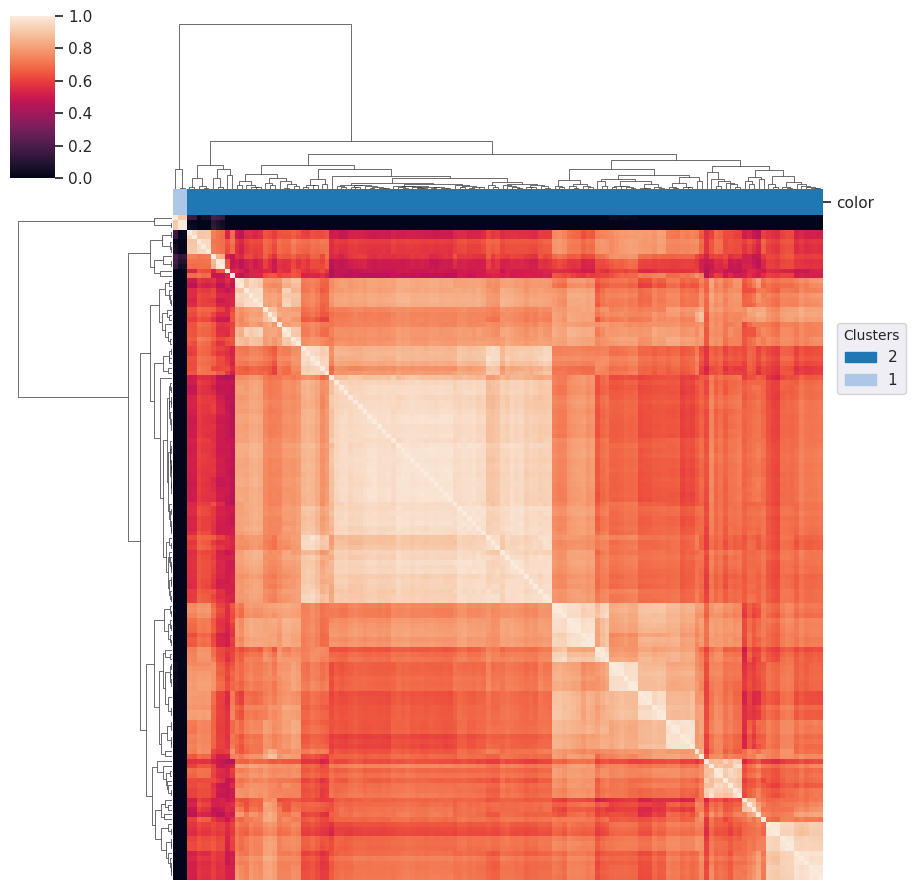

In [17]:
clusters = global_clustering(DF_log_tpm_passed_step2)

Select clusters to remove.

In [18]:
remove_clusters = [1]
passed_global_corr = clusters[~clusters.isin(remove_clusters)].index

In [19]:
passed_global_corr

Index(['SRX12668170', 'SRX12668171', 'SRX12668172', 'SRX12668176',
       'SRX12668179', 'SRX12668183', 'SRX12668188', 'SRX12668189',
       'SRX12668194', 'SRX12668195',
       ...
       'SRX368720', 'SRX368721', 'SRX368722', 'SRX368724', 'SRX9848492',
       'SRX9848493', 'SRX9848502', 'SRX9848503', 'SRX9848504', 'SRX9848505'],
      dtype='object', length=134)

The following code can be adapted to see the NCBI SRA accession for samples in each cluster.

In [20]:
clusters[clusters == 1]

SRX14927075    1
SRX14927076    1
SRX14927077    1
Name: cluster, dtype: int32

Re-cluster samples to ensure all outliers were removed.

In [21]:
DF_log_tpm_passed_step3 = DF_log_tpm[passed_global_corr]

Number of cluster:  13


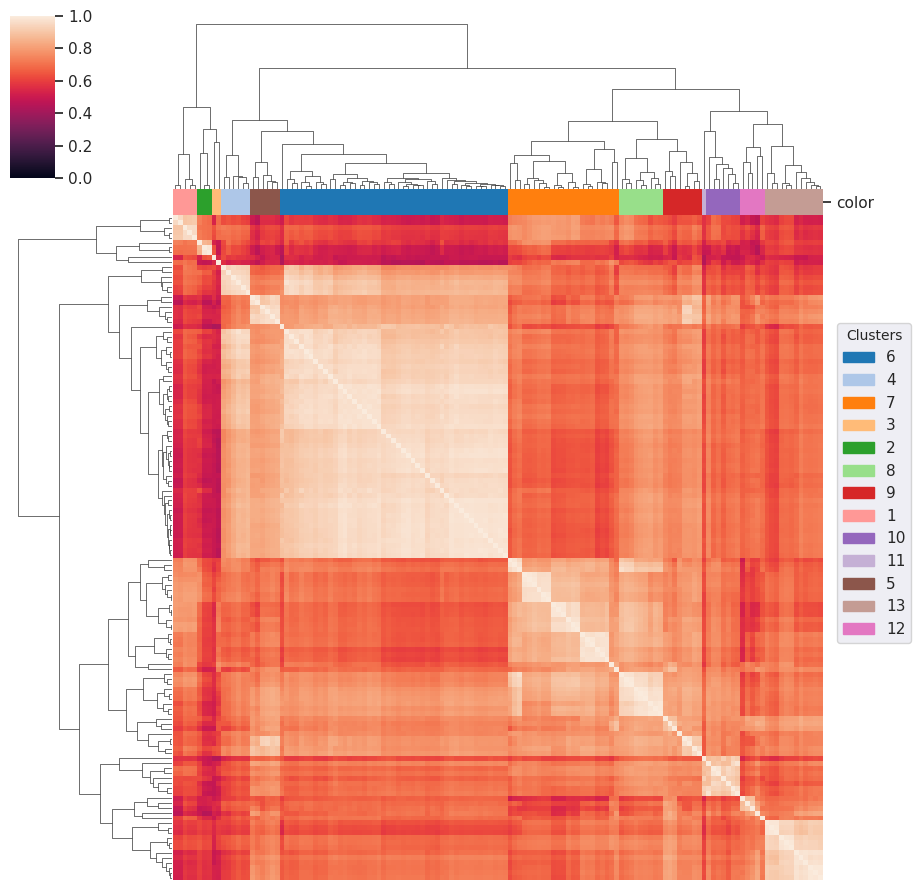

In [22]:
clusters = global_clustering(DF_log_tpm_passed_step3)

In [23]:
remove_clusters = [11]
passed_global_corr = clusters[~clusters.isin(remove_clusters)].index

In [24]:
clusters[clusters == 11]

SRX669722    11
Name: cluster, dtype: int32

In [25]:
len(passed_global_corr)

133

In [26]:
DF_log_tpm_passed_step3 = DF_log_tpm[passed_global_corr]

Number of cluster:  12


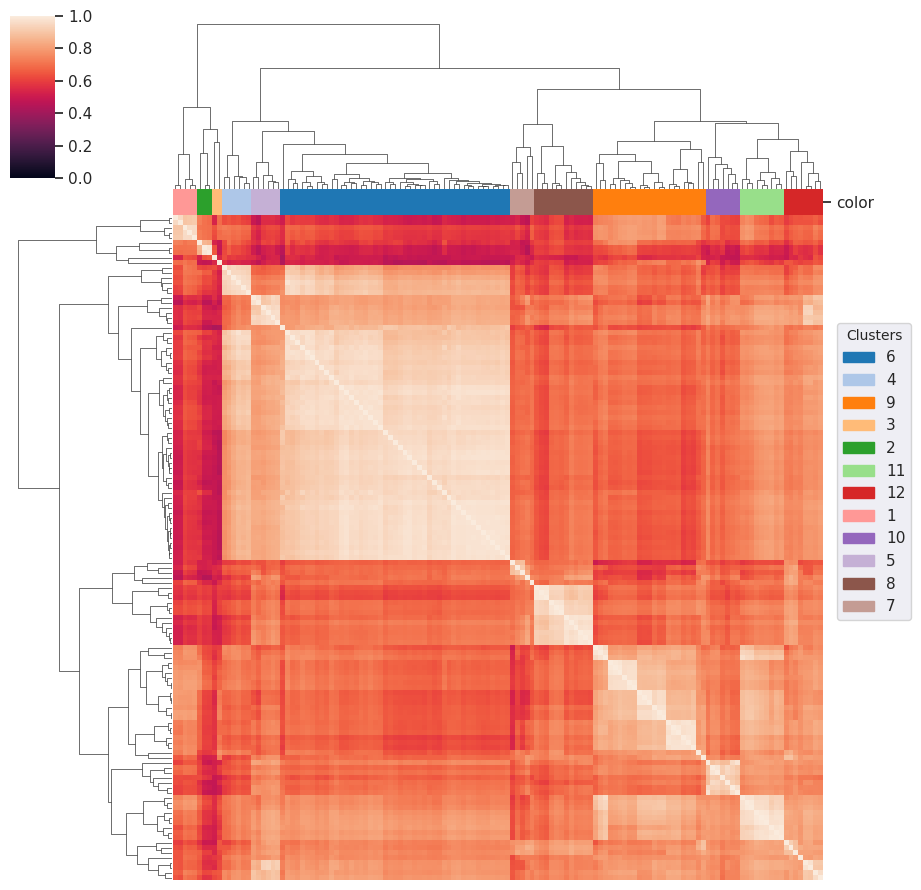

In [27]:
clusters = global_clustering(DF_log_tpm_passed_step3)

Once you are satisfied with your dataset, mark the samples that passed the global correlation

In [28]:
DF_metadata['passed_global_correlation'] = DF_metadata.index.isin(passed_global_corr)

In [29]:
DF_metadata.head()

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Submission,dbgap_study_accession,Consent,RunHash,ReadHash,R1,R2,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation
SRX12668170,SRR16464638,2021-10-21 12:51:12,2021-10-19 22:25:55,11521763,3304438182,11521763,286,1081,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,SRA1312575,NaN,public,B23F24CD4544D3CF2FF76B076B791FB0,F14BE5C31DBCBF9FDBCC8743D80284ED,NaN,NaN,True,True,True
SRX12668171,SRR16464639,2021-10-21 12:51:12,2021-10-19 22:37:27,14722609,4211672855,14722609,286,1382,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,SRA1312575,NaN,public,13AF2D44A3CB5D3E7BCBBB123FA5F6B1,1A4884B20D76E03FD5DC55E9B376EC7A,NaN,NaN,True,True,True
SRX12668172,SRR16464640,2021-10-21 12:51:12,2021-10-19 22:26:38,11368672,3231868266,11368672,284,1057,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,SRA1312575,NaN,public,C2B5A8D874C4988BBFB8B3F81C45B4C3,E7682D21F5669C0C426900E59A58637F,NaN,NaN,True,True,True
SRX12668173,SRR16464641,2021-10-21 12:51:12,2021-10-19 22:35:10,12835973,3648283176,12835973,284,1188,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,SRA1312575,NaN,public,E2F1CB56091B86A8797CB1A0B8D8AA49,0F50D3752E33265B73C7F04C34C78ADE,NaN,NaN,True,False,False
SRX12668174,SRR16464642,2021-10-21 12:51:12,2021-10-19 22:25:12,11293865,3195027108,11293865,282,1040,NaN,https://sra-downloadb.be-md.ncbi.nlm.nih.gov/s...,...,SRA1312575,NaN,public,3A20189D4682661312D323DDDD7EE8CE,8260A8A0EABCD2C83E7FDF43D5D661CF,NaN,NaN,True,False,False


# Remove failed samples

In [30]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [31]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

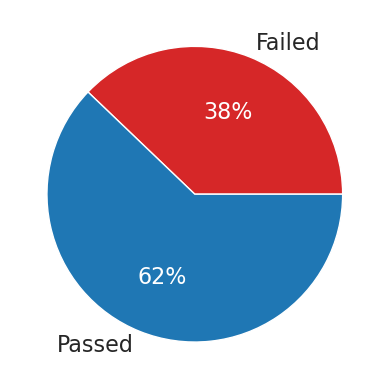

In [32]:
_,_,pcts = plt.pie(pass_qc.value_counts().reindex([False,True]),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

# Save current metadata

Enter path of interim metadata files here. It is recommended that the ``metadata_qc.tsv`` file is copied to a new ``metadata_qc_curated.tsv`` file before editing. This will prevent this notebook from over-writing any curated metadata.

In [33]:
metadata_all_qc_file = path.join('Species', species, 'metadata_qc_all.tsv') # Enter filename for full metadata QC file
metadata_qc_file = path.join('Species', species, 'metadata_qc_passed.tsv') # Enter filename for metadata QC file with only passing datasets

In [34]:
DF_metadata.to_csv(metadata_all_qc_file, sep='\t')
DF_metadata_passed.to_csv(metadata_qc_file, sep='\t')

# Metadata Curation

The next step is to curate the metadata. At a minimum, three new columns must be added to the metadata sheet:
* ``project``: Nickname for the project. Each bioproject should have a unique project IDs.
* ``condition``: Nickname for the experimental condition. Biological/technical replicates must have identical condition IDs.
* ``reference_condition``: Condition ID of the reference condition. Each project has a single reference condition (See [example metadata sheet](https://github.com/SBRG/nf-rnaseq-bacteria/blob/master/example_data/processed_data/metadata_curated.tsv))

Additional columns may include:
* ``strain_description``: The strain name, and any knock-outs or overexpressed genes
* ``base_media``: Media used (e.g. ``M9``)
* ``carbon_source``: Primary carbon source, with concentration in parentheses (e.g. ``glucose(.4%)``). This is usually empty for undefined media.
* ``nitrogen_source``: Primary nitrogen source, with concentration in parentheses (e.g. ``NH4Cl(1M)``). This is usually empty for undefined media.
* ``aerobicity``: Usually ``aerobic`` or ``anaerobic``
* ``treatment``: Any additional supplements or treatments added to the base media (e.g. ``thiamine(0.1M)`` or ``ampicillin(100ug/mL)``)
* ``temperature``
* ``pH``
* ``OD``: Approximate optical density of cells when selected for library preparation
* ``growth_phase``: e.g. ``mid-exponential`` or ``stationary``
* ``culture_type``: Usually ``batch`` or ``chemostat``
* ``skip``: Whether to skip a sample due to external reasons (e.g. not traditional RNA-seq, distant strain, or lack of metadata)

If specific metadata entries are not reported for a sample, these can be left blank. However, if no metadata can be gleaned from public databases, then we recommend discarding the samples.

Once the metadata has been curated, proceed to [Step 2](https://github.com/avsastry/modulome-workflow/edit/main/3_quality_control/expression_QC_part2.ipynb)